<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexto:-Insights" data-toc-modified-id="Contexto:-Insights-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexto: Insights</a></span></li><li><span><a href="#Lendo-Base" data-toc-modified-id="Lendo-Base-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo Base</a></span></li><li><span><a href="#EDA:-Plotagens-Gráficas" data-toc-modified-id="EDA:-Plotagens-Gráficas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA: Plotagens Gráficas</a></span><ul class="toc-item"><li><span><a href="#Donut-e-Pie-Chart" data-toc-modified-id="Donut-e-Pie-Chart-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Donut e Pie Chart</a></span></li><li><span><a href="#Countplot" data-toc-modified-id="Countplot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Countplot</a></span></li><li><span><a href="#Countplot-em-Barras-Agrupadas" data-toc-modified-id="Countplot-em-Barras-Agrupadas-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Countplot em Barras Agrupadas</a></span></li><li><span><a href="#Aggregation" data-toc-modified-id="Aggregation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Aggregation</a></span></li><li><span><a href="#Distplot" data-toc-modified-id="Distplot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Distplot</a></span></li><li><span><a href="#Correlação-entre-as-Features" data-toc-modified-id="Correlação-entre-as-Features-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlação entre as Features</a></span></li><li><span><a href="#Análise-Geral-da-Base" data-toc-modified-id="Análise-Geral-da-Base-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Análise Geral da Base</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo apresentar as funcionalidades do pacote **_pycomp_** como uma forma direta de explorar e retirar insights de bases de dados. Disponível no [PyPi](https://pypi.org/project/pycomp/) e no [GitHub](https://github.com/ThiagoPanini/pycomp), o pacote proporciona, a partir de seu módulo `viz`, o encapsulamento de códigos para plotagens gráficas customizadas capazes de proporcionar um rico processo de EDA ao desenvolvedor/cientista atuante.

- _Pré requisitos: conhecimento básico em Python e uma base de dados em mãos!_

    O resto, deixa que o pycomp faz!

# Contexto: Insights

Em uma visão geral, é comum, em tarefas envolvendo a construção de modelos de Machine Learning, aplicar um passo anterior conhecido como EDA (Exploratory Data Analysis). Tal passo é responsável por estreitar as relações entre o cientista e a base de dados que se tem em mão para a dada tarefa. Nele, diversos métodos são aplicados para extrair informações e insights relevantes da base antes da aplicação direta de um modelo preditivo. 

As principais bibliotecas utilizadas nessa etapa exploratória são pandas, numpy, matplotlib, seaborn ou qualquer outra biblioteca gráfica disponível em Python. Nesse contexto, será apresentado o módulo `pycomp.viz.insights` como uma excelente ferramenta para a aplicação do processo exploratório em bases. Através de seus métodos de plotagem, será possível retirar ricos insights de bases com poucas linhas de código, facilitando assim o ganho de conhecimento da base e o subsequente treinamento de um modelo preditivo.

Como exemplo, será utilizada a base de dados [Titanic](https://www.kaggle.com/c/titanic): um problema de negócio clássico que envolve o treinamento de modelos de Machine Learning para o entendimento das principais características relacionadas a sobrevivência dos passageiros e tripulantes no naufrágio do icônico navio.

In [1]:
# Importando bibliotecas
import os
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Definindo variáveis do projeto
DATA_PATH = '../../data/titanic/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Lendo Base

In [3]:
# Lendo base de treino e verificando conteúdo
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
print(f'Dimensões da base de treino: {df.shape}')
df.head()

Dimensões da base de treino: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Uma vez lida a base de treino, é possível analisar os atributos contidos na mesma a partir de seus [metadados](https://www.kaggle.com/c/titanic/data):

- **_PassengerId_:** id do passageiro ou tripulante do navio;
- **_Survived_:** variável resposta indicando a sobrevivência do passageiro ou tripulante;
- **_Pclass_:** categoria indicativa da classe do ticket do passageiro (1=alta, 2=média ou 3=baixa);
- **_Name_:** nome do passageiro ou tripulante;
- **_Sex_:** gênero do passageiro ou tripulante;
- **_Age_:** idade do passageiro ou tripulante;
- **_SibSp_:** quantidade de irmãos ou cônjuges presentes na embarcação;
- **_Parch_:** quantidade de pais ou filhos presentes na embarcação;
- **_Ticket_:** número referente ao ticket do passageiro ou tripulante;
- **_Fare_:** valor da tarifa paga pelo passageiro ou tripulante;
- **_Cabin_:** número da cabine do passageiro ou tripulante;
- **_Embarked_:** porto de embarque do passageiro ou tripulante (C=Cherbourg, Q=Queenstown, S=Southampton).

# EDA: Plotagens Gráficas

Como mencionado na introdução deste notebook, o módulo `pycomp.viz.insights` traz consigo uma série de funções encapsuladas para a plotagem e customização de gráficos em Python, permitindo assim um vasto leque de possibilidades de avaliação e extração de insights de bases de dados lidas. As sessões a seguir serão divididas por tipo de gráfico, trazendo em cada tópico, gráficos customizados para a referida base de dados.

In [4]:
!pip install '../../dist/pycomp-0.1.5-py3-none-any.whl'

Processing /home/paninit/workspaces/pycomp/dist/pycomp-0.1.5-py3-none-any.whl
  Attempting uninstall: pycomp
    Found existing installation: pycomp 0.1.4
    Uninstalling pycomp-0.1.4:
      Successfully uninstalled pycomp-0.1.4


In [5]:
# Importando todas as funções do módulo
from pycomp.viz.insights import *
from pycomp.viz.formatador import *

## Donut e Pie Chart

O primeiro combo de gráficos a ser mencionado neste guia de utilização do módulo `insights` traz representações atreladas a gráficos de rosca e de pizza. Considerando o efeito visual de ambos, tais gráficos são muito utilizados em comparações categóricas de colunas com um número limitado de entradas, permitindo uma análise de volumetrias e de representatividade dessas diferentes entradas frente ao todo.

Nos exemplos abaixo, serão propostas plotagens personalizadas envolvendo gráficos de rosca e de pizza a partir de funções prontas desenvolvidas no módulo `insights`.

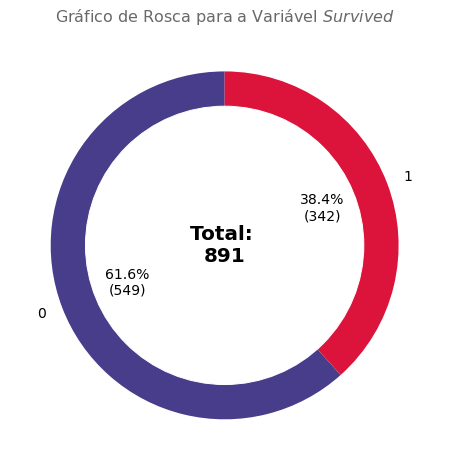

In [6]:
# Analisando volumetrias da variável Survived
plot_donut_chart(df=df, col='Survived')

O gráfico acima traz uma visão de volumetrias da variável `Survived` (sobrevivência ou não dos passageiros do Titanic). Nele, é possível notar que o maior número de entradas da base referem-se a `Survived=0` (549 ou 61.6%). É esperado que o cientista desenvolvedor saiba exatamente o significado de `Survived=0` como sendo o de vítimas do naufrágico do navio, Entretanto, visando proporcionar uma maior facilidade no entendimento desse tipo de análise à todos os consumidores deste notebook, as funções do módulo `insights` trazem consigo uma série de argumentos adicionais para uma completa customização dos gráficos. Ainda relacionado a plotagem acima, é possível notar:

- Rótulos não explicativos (0 e 1);
- Título genérico;
- Cores não representativas ou não intuitivas (azul para "vítima" e vermelho para "sobreviventes");

Visando endereçar todos os tópicos acima citados, a plotagem será refeita considerando customizações adicionais.

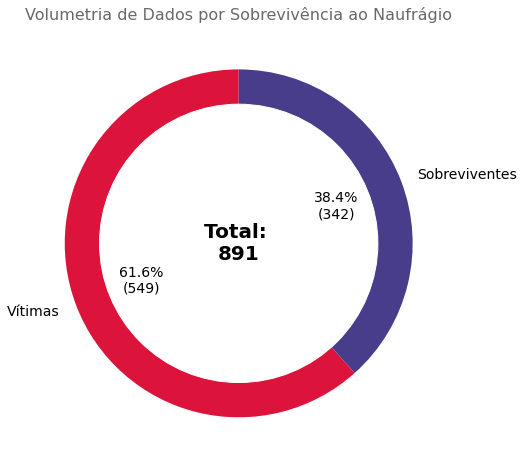

In [7]:
# Definindo labels para coluna Survived
labels_survived = {0: 'Vítimas', 1: 'Sobreviventes'}

# Customizando gráfico de roscas com **kwargs
plot_donut_chart(df=df, col='Survived', label_names=labels_survived, colors=['crimson', 'darkslateblue'], 
                 title='Volumetria de Dados por Sobrevivência ao Naufrágio')

Ótimo! A partir dos parâmetros adicionais da função, foi possível atender as necessidades previamente mencionadas para transformar o gráfico inicial em algo mais explicativo e intuitivo para o consumidor final. Mantendo a mesma análise de sobrevivência, o módulo `insights` permite a plotagem de gráficos customizados de pizza. Dessa forma, a visão análoga pode ser dada por:

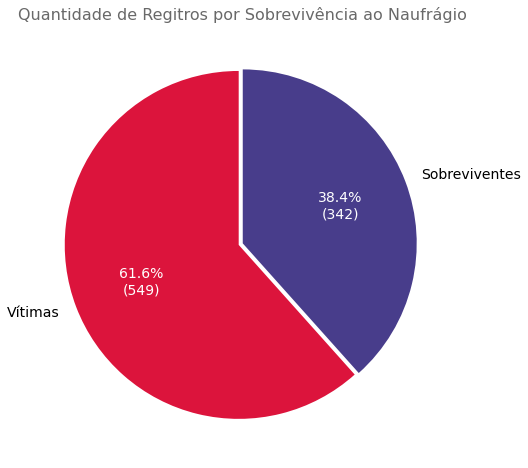

In [8]:
# Plotando gráfico de pizza para analisar volumetrias relacionadas a sobrevivencia
plot_pie_chart(df=df, col='Survived', label_names=labels_survived, 
               colors=['crimson', 'darkslateblue'], explode=(0.025, 0), shadow=False,
               title='Quantidade de Regitros por Sobrevivência ao Naufrágio')

Os gráficos de pizza e de rosca entregues pelo módulo `insights` respondem perguntas atreladas a **volumetrias** das bases. Em outras palavras, utilizando tais funções é possível responder, por exemplo, "qual a quantidade de linhas da base quebradas pela coluna _X_?"

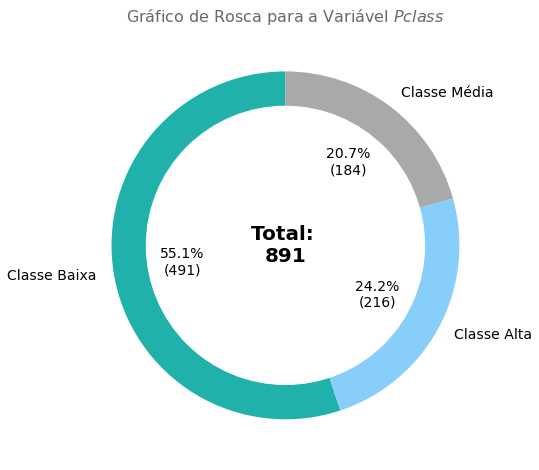

In [9]:
# Definindo labels para a coluna Pclass
labels_pclass = {1: 'Classe Alta', 2: 'Classe Média', 3: 'Classe Baixa'}

# Anaĺise de volumetria por classe social
plot_donut_chart(df=df, col='Pclass', colors=['lightseagreen', 'lightskyblue', 'darkgrey'],
                 label_names=labels_pclass)

Por fim, uma plotagem gráfica adicional criada como uma forma de analisar volumetrias de duas colunas diferentes é a `Double Donut Chart`. Com ela, é possível visualizar, em um gráfico de rosca, volumetrias atreladas a duas colunas categóricas relacionadas.

No gráfico abaixo, serão analisadas as volumetrias de sobreviventes por gênero.

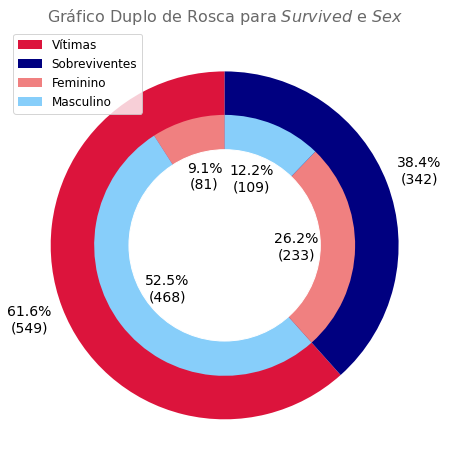

In [10]:
# Criando labels para a classe sex
labels_sex = {'male': 'Masculino', 'female': 'Feminino'}

# Analisando volumetrias
plot_double_donut_chart(df=df, col1='Survived', col2='Sex', 
                        label_names_col1=labels_survived, label_names_col2=labels_sex, 
                        colors1=['crimson', 'navy'], colors2=['lightcoral', 'lightskyblue'])

Em um formato dinâmico, o gráfico acima permite concluir, por exemplo, que 468 das vítimas do naufrágio eram do gênero masculino (52,5% do total). Por outro lado, 233 dos 342 dos sobreviventes eram do gênero feminino. Os números indicam uma preferência de resgate à mulheres durante o naufrágio do navio.

## Countplot

Como uma forma alternativa de analisar volumetrias dentro do processo de exploração de uma base de dados, existe a possibilidade de plotagem de gráficos de barras para diferentes entradas categóricas. Na prática, as representações de volumetrias se assemelham ao mostrado na sessão _3.1 Donut Chart e Pie Chart_, com a diferença de que as entradas estão dispostas em barras verticais ou horizontais.

Para consolidar essa análise de volumetrias, a função `plot_countplot()` traz uma série de argumentos adicionais que podem ser utilizados para customizar o gráfico de acordo com o objetivo final do estudo.

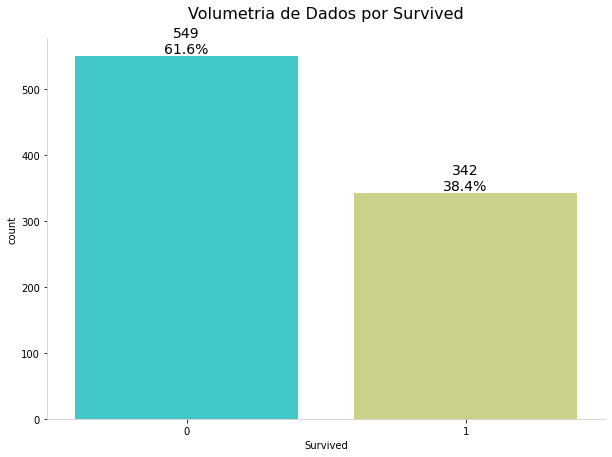

In [11]:
# Plotando volumetrias por sobrevivência
plot_countplot(df=df, col='Survived')

O gráfico de barras acima é análogo ao primeiro gráfico de rosca utilizado nessa demonstração. O objetivo é visualizar a quantidade de sobreviventes e vítimas do naufrágio do navio Titanic a partir da coluna `Survived` presente na base.

Uma das grandes funcionalidades do pacote `pycomp` é disponibilizar diversas ferramentas para que o usuário final possa escolhar a que mais se enquadra dentro de seu respectivo projeto.

Ainda nessa visão, a função `plot_countplot()` permite uma série de configurações adicionais para customização do gráfico gerado. A seguir, a mesma análise de volumetria por sobrevivência será realizada, porém adicionando alguns parâmetros personalizados para a função.

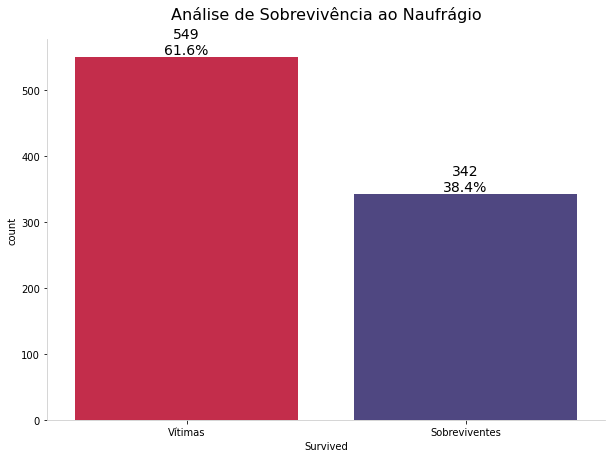

In [12]:
# Personalizando análise de sobrevivência
plot_countplot(df=df, col='Survived', palette=['crimson', 'darkslateblue'], 
               label_names=labels_survived, title='Análise de Sobrevivência ao Naufrágio')

Simulando uma análise análoga a volumetria de dados por classe social (sessão 3.1 acima), é possível plotar o seguinte gráfico de contagem:

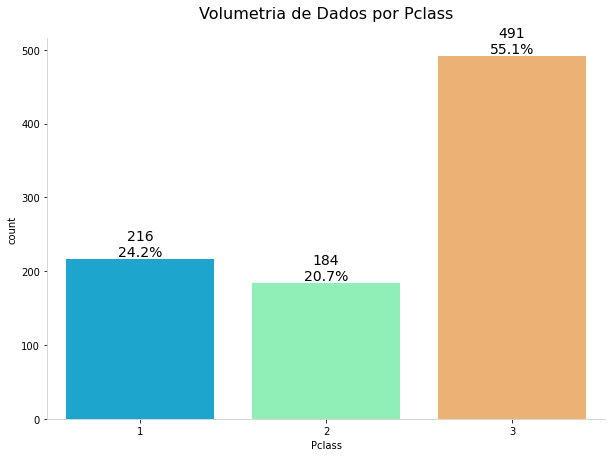

In [13]:
# Volumetria de dados por classe social (Pclass)
plot_countplot(df=df, col='Pclass')

Com o parâmetro `order`, é possível definir uma ordenação no gráfico a partir das volumetrias:

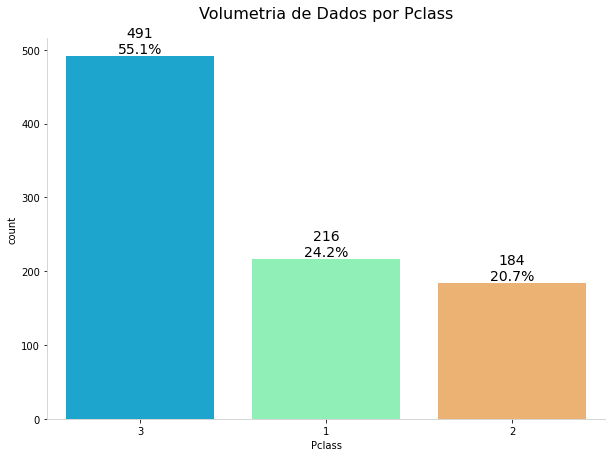

In [14]:
# Ordenando gráfico
plot_countplot(df=df, col='Pclass', order=True)

Como visto no exemplo de volumetria por sobrevivência, o parâmetro `label_names` permite a customização dos rótulos de eixo do gráfico:

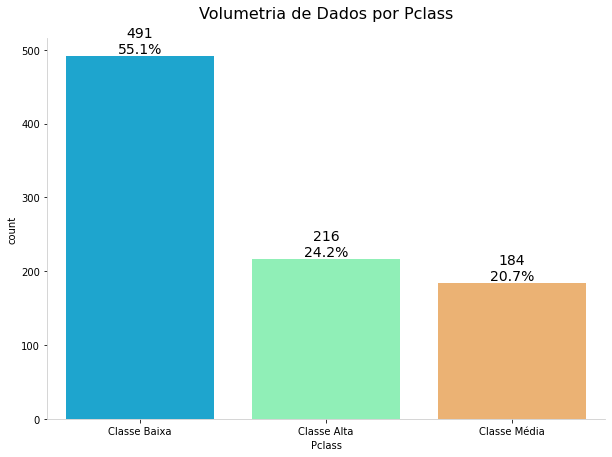

In [15]:
# Customizando rótulos
plot_countplot(df=df, col='Pclass', order=True, label_names=labels_pclass)

Com o argumento `palette`, é possível modificar a paleta de cores do gráfico:

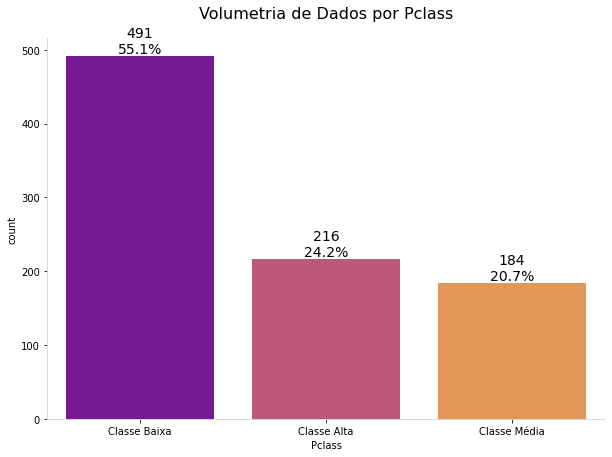

In [16]:
# Customizando cores
plot_countplot(df=df, col='Pclass', order=True, label_names=labels_pclass, palette='plasma')

Visando incrementar ainda mais a plotagem, o parâmetro `hue` permite adicionar uma quebra adicional na análise de volumetria. O exemplo a seguir traz uma ideia de volumetria de sobreviventes/vítimas por cada uma das classes sociais presentes.

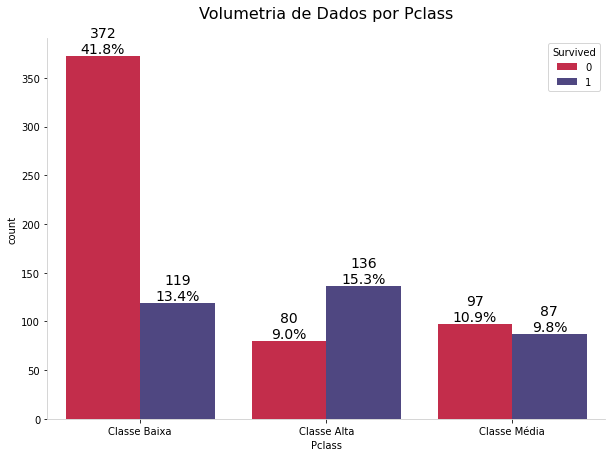

In [17]:
# Adicionando quebra adicional
plot_countplot(df=df, col='Pclass', order=True, label_names=labels_pclass,
               palette=['crimson', 'darkslateblue'], hue='Survived')

Analisando o gráfico acima, é possível extrair um insight relevante:

De todos os passageiros pertencentes a `Classe Baixa`, o volume relativo de vítimas foi extremamente superior ao volume de sobreviventes. Esse cenário é diferente para passageiros da `Classe Média`, onde o percentual de vítimas é bem próximo ao percentual de sobreviventes. Já para aqueles pertencentes a `Classe Alta`, o volume de sobreviventes superou o volume de vítimas.

Ao que tudo indica, o resgate de passageiros com melhores condições financeiras foi priorizado durante o naufrágio do navio Titanic.

___


Uma das vantagens em utilizar gráficos de barras ao invés de gráficos de rosca/pizza, é a possibilidade de visualizar um número maior de entradas sem perder poder visual. No exemplo abaixo, será investigada a presença de mais de um passageiro por cabine através da plotagem das top 10 cabines com mais entradas vinculadas.

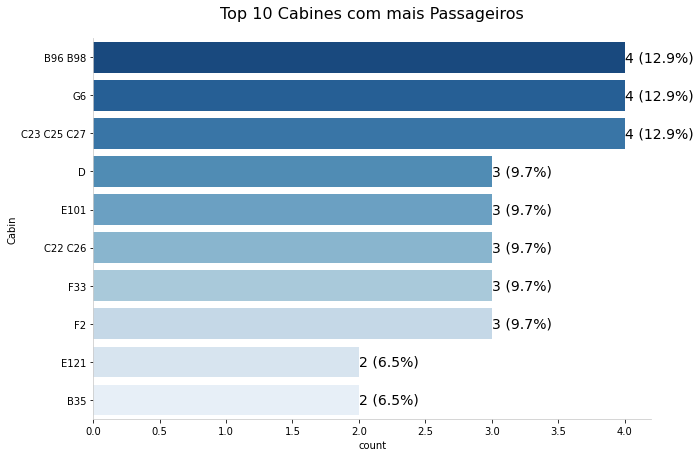

In [18]:
# Top cabines
plot_countplot(df=df, col='Cabin', top=10, order=True, orient='v', palette='Blues_r',
               title='Top 10 Cabines com mais Passageiros')

Um outro exemplo de investigação utilizando gráficos de volumetria/contagem no contexto do conjunto de dados, é a análise da quantidade de passageiros que levaram consigo irmãos ou cônjuges na viagem (coluna `SibSp`).

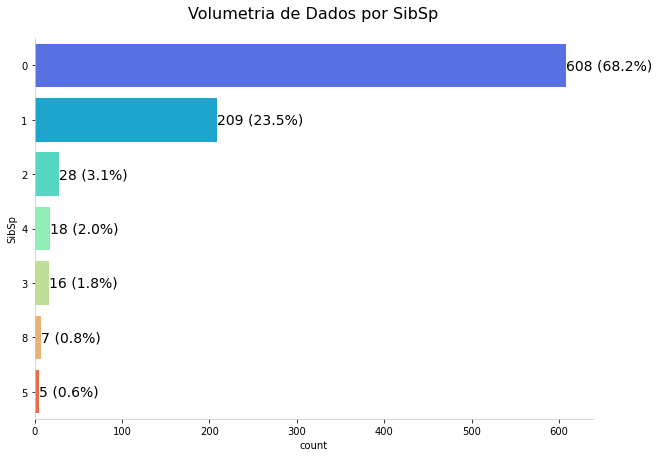

In [19]:
# Analisando volumetrias por acompanhante (irmãos ou cônjuges)
plot_countplot(df=df, col='SibSp', order=True, orient='v')

SibSp: quantidade de irmãos ou cônjuges presentes na embarcação;
Parch: quantidade de pais ou filhos presentes na embarcação;

Utilizando mais uma vez o parâmetro `hue`, é possível responder a seguinte pergunta:

_Existe alguma relação entre o número de irmãos ou cônjuges com a taxa de sobrevivência dos passageiros?_

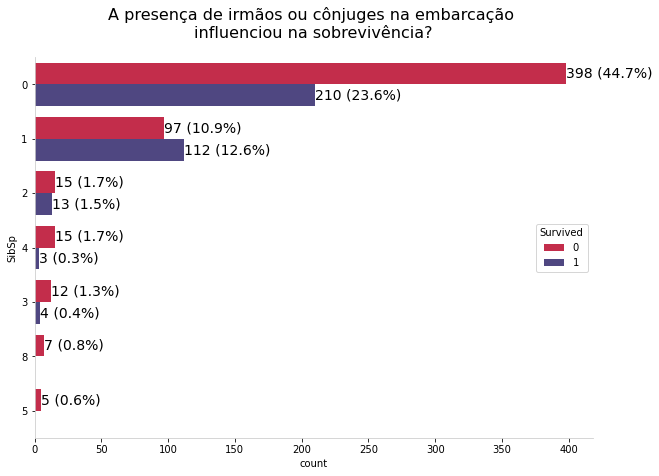

In [20]:
# Analisando presença de parentes com sobrevivência
plot_countplot(df=df, col='SibSp', order=True, orient='v', hue='Survived', 
               palette=['crimson', 'darkslateblue'], 
               title='A presença de irmãos ou cônjuges na embarcação \ninfluenciou na sobrevivência?')

Para o questionamento realizado e respondido com o gráfico acima, é possível notar uma relação positiva de sobrevivência entre passageiros que estavam com 1 irmão ou pai/mãe na embarcação. No contexto dos dados, provavelmente, aqueles que tinham pelo menos 1 ou 2 companheiros de viagem fornecem auxílio mútuo durante o resgate.

A situação é a mesma para passageiros que tinham pais ou filhos presentes na viagem (coluna `Parch`)

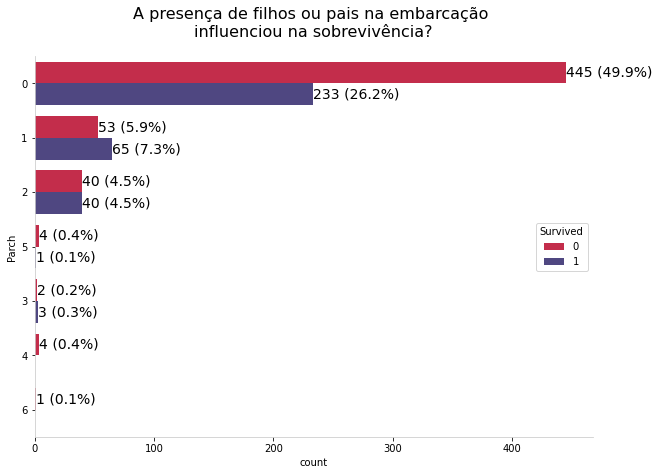

In [21]:
# Analisando influência de filhos e pais na sobrevivência
plot_countplot(df=df, col='Parch', hue='Survived', order=True, orient='v',
               palette=['crimson', 'darkslateblue'], 
               title='A presença de filhos ou pais na embarcação \ninfluenciou na sobrevivência?')

Comparando as análises por `SibSp` (cônjuges ou irmãos) e `Parch` (pais ou filhos), nota-se uma semelhança entre os cenários de sobrevivência ao naufrágio.

## Countplot em Barras Agrupadas

No exemplo de gráfico de volumetrias de classe pela quebra de sobrevivência, foi possível retirar algumas conclusões relevantes sobre a base de dados e como a classe social afetou as chances de sobrevivências dos passageiros e tripulantes do navio Titanic.

Uma outra forma de analisar essa mesma situação é a partir de um gráfico de barras agrupadas, separando as séries pela variável que se queira observar. Nesse tipo de plotagem, as diferenças percentuais de representatividade se tornam mais claras ao usuário final, abrindo a possibilidade de conclusões mais assertivas a respeito das quebras envolvidas no contexto.

Erro ao mapear labels na coluna Pclass. Exception: invalid literal for int() with base 10: ''


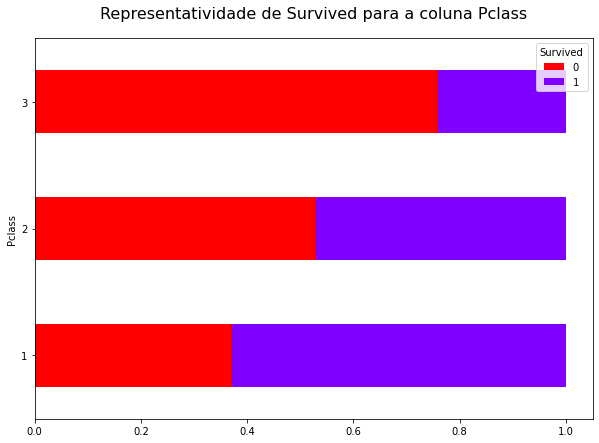

In [22]:
# Plotando gráfico de representatividade percentual
plot_pct_countplot(df=df, col='Pclass', hue='Survived', palette='rainbow_r',
                   label_names=labels_pclass)

A plotagem acima demonstra claramente o impacto da classe social na sobrevivência dos passageiros do navio. Cada série nas barras horizontais representam uma entrada diferente do argumento `col` passado na função (no exemplo, a coluna referência é `Pclass`). A legenda é guiada pelo argumento `hue` passado na função (no caso, a quebra utiliada é dada pela coluna `Survived`). 

Dessa forma, é possível analisar claramente como a `Classe Baixa` possui mais vítimas do que sobreviventes (proporção de aproximadamente 80% de vítimas contra 20% de sobrevitentes). Entre os integrantes da `Classe Alta`, percebe-se claramente o cenário inverso: tem-se aproximadamente 40% de vítimas contra 60% de sobreviventes.

## Aggregation

Análises de agregação podem ser consideradas frentes extremamente importantes em processos de exploração de dados. A liberdade de se agrupar e analisar dados a partir de alguma função estatística permite a retirada de ricos insights a respeito da base. Dessa forma, a função `plot_aggregation()` foi desenvolvida de modo a permitir a rápida análise de dados agregados através da definição de três principais argumentos: `group_col`, `value_col` e `aggregation`.

No gráfico abaixo, é possível retornar a média de idade dos passageiros do navio para cada classe social atrelada.

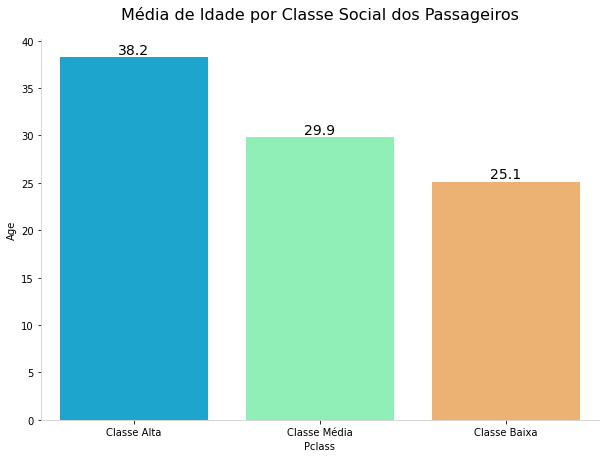

In [23]:
# Média de idade por classe social
plot_aggregation(df=df, group_col='Pclass', value_col='Age', aggreg='mean', label_names=labels_pclass,
                 title='Média de Idade por Classe Social dos Passageiros')

A visão acima permite concluir que integrantes da `Classe Alta` possuem uma maior média de idade: intuitivamente, é possível corroborar esse dado supondo a presença de idosos com maior poder de aquisição financeira nessa classe.

Analogamente, o gráfico de agregação mostra um público mais jovem pertencende às classes `Média` e `Baixa`.

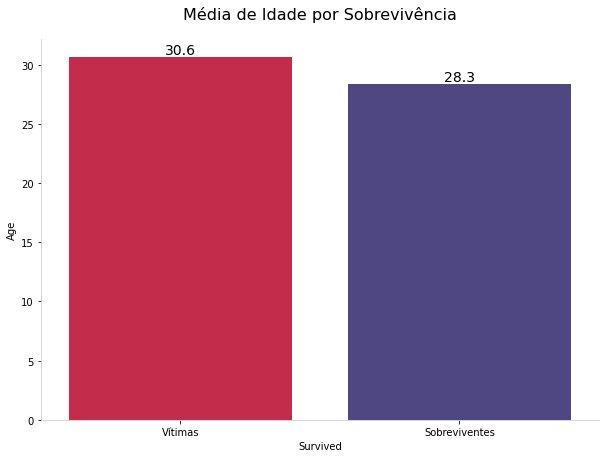

In [24]:
# Analisando média de idade por sobreviventes
plot_aggregation(df=df, group_col='Survived', value_col='Age', aggreg='mean',label_names=labels_survived, 
                 palette=['crimson', 'darkslateblue'], title='Média de Idade por Sobrevivência')

Provavelmente, a prioridade dada a crianças durante o resgate do naufrágio fez com que a média de idade por sobrevivência se comportasse de acordo com o gráfico acima, resultando em uma menor média de idade para os sobreviventes em relação as vítimas.

A base de dados possui uma coluna chamada `Fare` com o objetivo de informar a tarifa aproximada paga por passageiro no embarque do navio. Provavelmente, este pode ter sido um fator influenciador na taxa de sobrevivência ao naufrágio. Para averiguar essa suposição, é possível utilizar a função `plot_aggregation()` para verificar uma média de ticket pago por sobrevivência

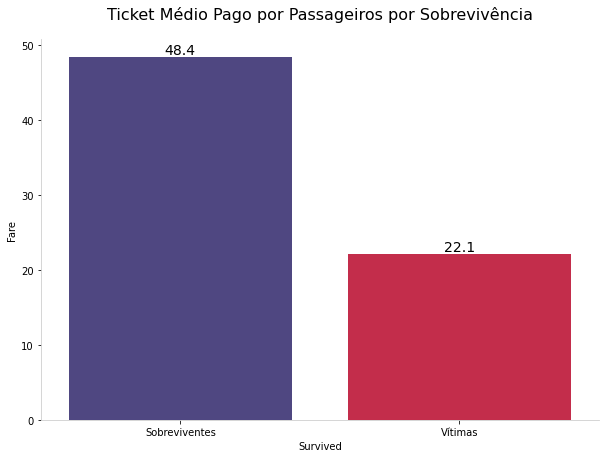

In [25]:
# Valor pago pelo ticket
plot_aggregation(df=df, group_col='Survived', value_col='Fare', aggreg='mean',
                 label_names=labels_survived, palette=['darkslateblue', 'crimson'],
                 title='Ticket Médio Pago por Passageiros por Sobrevivência')

Interessante visualizar que os sobreviventes, em média, pagaram um valor maior no ticket de entrada para a viagem (média de 48.8 por passageiro). Já as vítimas tiveram, em média, um valor baixo de 22.1 pagos por ticket.

É possível levantar um questionamento atrelado a melhores condições dadas àqueles que adquiriram o ticket por um preço maior. Para corroborar essa tese, é possível analisar o valor médio pago pelo ticket por classe social.

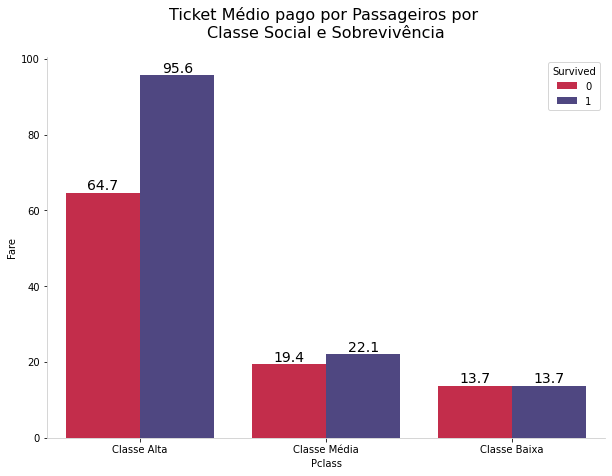

In [26]:
# Ticket médio por classe social
plot_aggregation(df=df, group_col='Pclass', value_col='Fare', aggreg='mean', hue='Survived',
                 label_names=labels_pclass, palette=['crimson', 'darkslateblue'],
                 title='Ticket Médio pago por Passageiros por \nClasse Social e Sobrevivência')

## Distplot

Até este ponto do processo de EDA, algumas plotagens gráficas serviram como base para conclusões a respeito do contexto da base de dados em referência ao naufrágio do navio Titanic. Em grande parte dessas plotagens, foram utilizadas quebras categóricas para tentar exemplificar ou analisar mais detalhamente uma hipótese. A partir desse ponto, a função `plot_distplot()` traz uma abordagem contínua e de densidade para propor uma análise na base utilizando colunas numéricas.

Para exemplificar uma utilização prática dessa função, o gráfico abaixo traz uma distribuição da variável `Age` encontrada na base de dados. O objetivo é analisar como a idade dos passageiros do navio está distribuída.

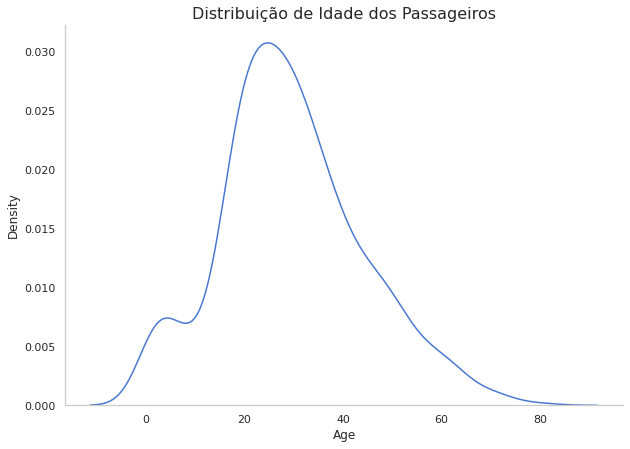

In [27]:
# Analisando distribuição de idade
plot_distplot(df=df, col='Age', title='Distribuição de Idade dos Passageiros')

A função `plot_distplot()` traz algumas features extremamente interessantes para análises em variáveis contínuas. Uma delas se faz presente através do parâmetro `kind` que, por sua vez, pode ser configurado de modo a plotar *5 diferentes gráficos*:

* `kind='dist'` [default]: realiza a plotagem de um gráfico de distribuição padrão (`sns.distplot`)
* `kind='kde'`: realiza a plotagem de um gráfico de distribuição não paramétrica (`sns.kdeplot`)
* `kind='box'`: realiza a plotagem de um gráfico de boxplot (`sns.boxplot`)
* `kind='boxen'`: realiza a plotagem de um gráfico de boxenplot (`sns.boxenplot`)
* `kind='strip'`: realiza a plotagem de um gráfico de stripplot (`sns.stripplot`)

Ilustrando aplicações adicionais, o gráfico abaixo controi uma plotagem de densidade não paramétrica de idade por classe social:

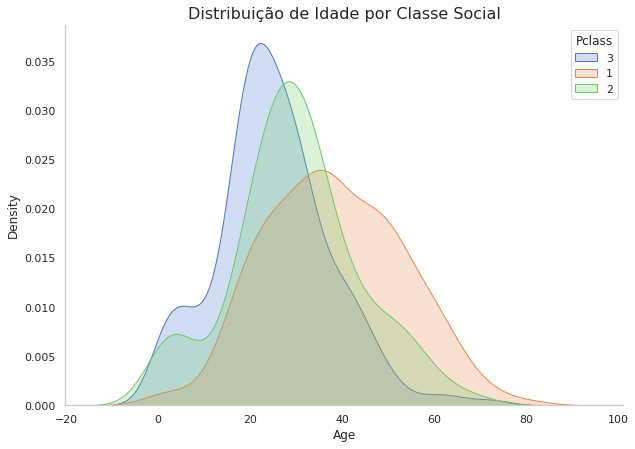

In [28]:
# Realizando plotagem não paramétrica
plot_distplot(df=df, col='Age', hue='Pclass', kind='kde', shade=True,
              title='Distribuição de Idade por Classe Social')

Em um outro exemplo, o gráfico abaixo realiza uma análise de ticket médio pago (`Fare`) por classe social em um gráfico boxplot:

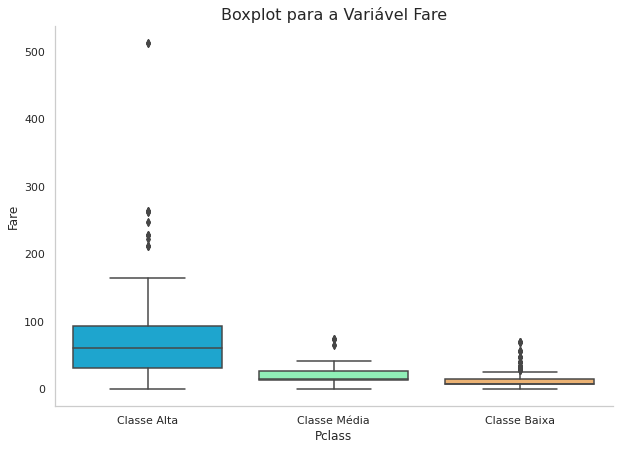

In [29]:
# Plotando boxplot de ticket médio
plot_distplot(df=df, col='Fare', hue='Pclass', kind='box', label_names=labels_pclass)

O mesmo gráfico acima, sob a ótica de um boxenplot, seria dado por:

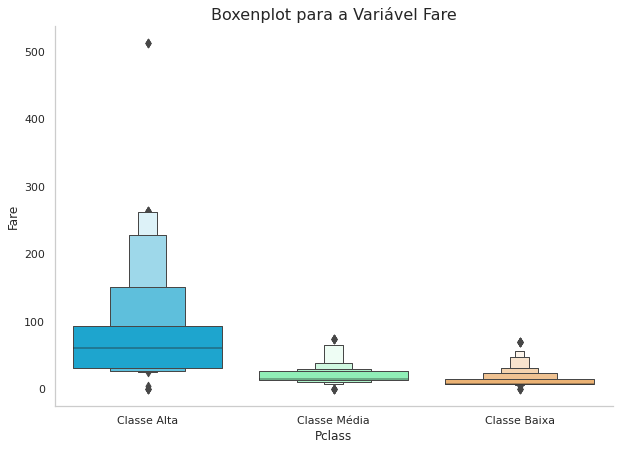

In [30]:
# Boxenplot
plot_distplot(df=df, col='Fare', hue='Pclass', kind='boxen', label_names=labels_pclass)

Por fim, uma análise análogo aos dois gráficos acima, utilizando a configuração `kind='strip'`, teria o seguinte efeito:

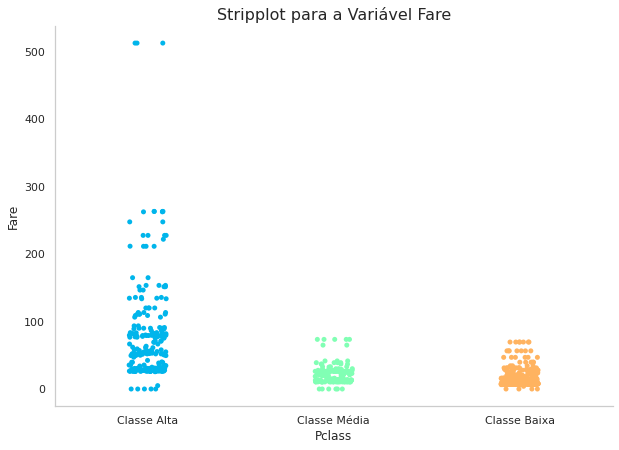

In [31]:
# Stripplot
plot_distplot(df=df, col='Fare', hue='Pclass', kind='strip', label_names=labels_pclass)

## Correlação entre as Features

Em uma base de dados com uma grande quantidade de features, seria extremamente relevante analisar visualmente como as variáveis se correlacionam entre si e em relação a uma variável target específica. Seguindo esse propósito, a função `plot_corr_matrix()` aplica uma análise de correlação e plota um _heatmap_ responsável por mostrar ao usuário uma visão clara sobre a relação (positiva ou negativa) entre as features numéricas de uma base.

Link de referência: https://realpython.com/numpy-scipy-pandas-correlation-python/

Abaixo, um exemplo de matriz de correlação plotada para a base titanic.

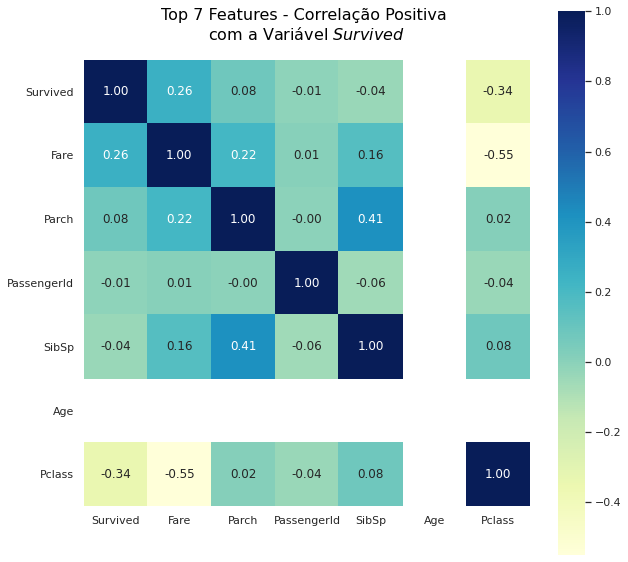

In [32]:
# Matriz de correlação
plot_corr_matrix(df=df, corr_col='Survived')

No gráfico acima é possível notar que a variável `Fare` é aquela que tem uma maior correlação positiva com a variável `Survived` (target de um possível modelo preditivo), indicando assim que quando maior o ticket médio pago pelo passageiro, mais provável a chance de sobrevivência (`Fare` aumenta e `Survived` se aproxima de 1).

Um exemplo do outro extremo de análise se dá pela variável `Pclass`, indicada pela matriz como a variável com a maior correlação inversa em relação a `Survived`. Isso significa que, quanto maior o valor dado para `Pclass` (lembrando que as classes sociais possíveis são 1, 2 e 3, sendo respectivamente, as classes alta, média e baixa), menor as chances de sobrevivência. Em outras palavras, quanto mais `Pclass` se aproxima de 3 (classe alta), mais `Survived` se aproxima de 1 (sobreviventes).

_Observação: a coluna `Age` apresentou valores vazios de correlação. Isso pode ser explicado pela possível presença de dados nulos nessa coluna. Nas células abaixo, será feita uma investigação e possível correção dos dados nulos nessa coluna, plotando assim uma nova matriz de correlação envolvendo também a variável `Age`_

In [33]:
# Dados nulos em "Age"
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

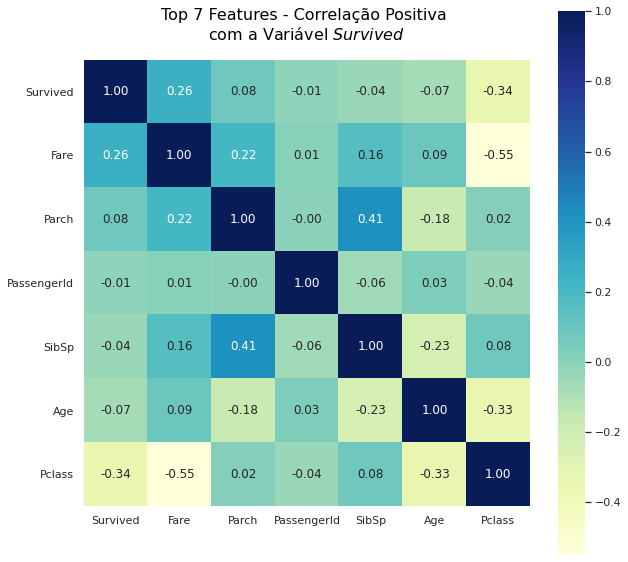

In [34]:
# Preenchendo dados nulos
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

# Plotando nova matriz
plot_corr_matrix(df=df, corr_col='Survived')

Um dos argumentos adicionais da função `plot_corr_matrix()` permite a inversão da análise de correlação, transformando a análise _positiva_ (default) em uma análise de correlação _negativa_. O objetivo, nesse caso, é observar a correlação com uma variável específica através da ótica inversa.

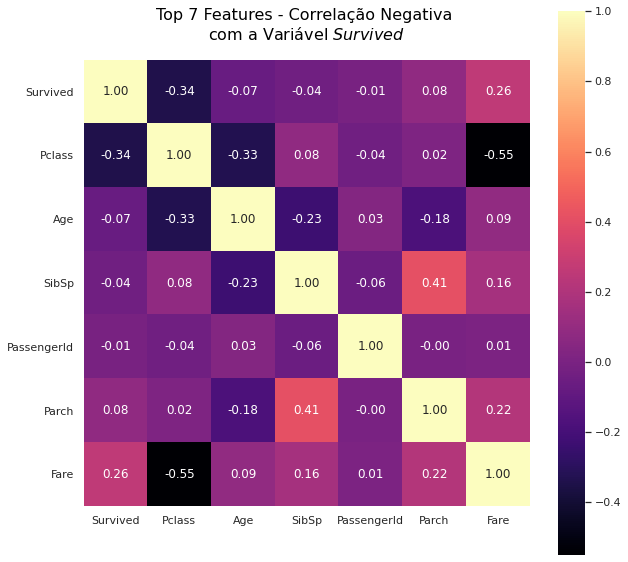

In [35]:
# Correlação negativa
plot_corr_matrix(df=df, corr_col='Survived', corr='negative')

## Análise Geral da Base

Uma outra forma de analisar a base de um modo geral é criar um report panorâmico contendo alguns parâmetros importantes de avaliação. Para isso, a função `data_overview()` é responsável por receber um dataset como argumento e analisar parâmetros chave da base, como por exemplo, dados nulos, correlação com alguma variável target, entre outros fatores.

No exemplo abaixo, tal função será executada de modo a retornar uma análise geral da base titanic.

In [36]:
# Analisando colunas da base
df_overview = data_overview(df=df, corr=True, target='Survived')
df_overview

,feature,qtd_null,pct_null,dtype,qtd_cat,target_pearson_corr
0,Cabin,687,0.771044,object,147,NaN
1,Embarked,2,0.002245,object,3,NaN
2,PassengerId,0,0.000000,int64,0,-0.005007
3,Survived,0,0.000000,int64,0,1.000000
4,Pclass,0,0.000000,int64,0,-0.338481
5,Name,0,0.000000,object,891,NaN
6,Sex,0,0.000000,object,2,NaN
7,Age,0,0.000000,float64,0,-0.069809
8,SibSp,0,0.000000,int64,0,-0.035322
9,Parch,0,0.000000,int64,0,0.081629
